In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"putriadinda19","key":"f4a92379706ea1906b0a10ffcde06b74"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d mcdonalds/nutrition-facts

  0% 0.00/7.37k [00:00<?, ?B/s]
100% 7.37k/7.37k [00:00<00:00, 15.6MB/s]


In [4]:
!mkdir nutrition-facts
!unzip nutrition-facts.zip -d nutrition-facts
!ls nutrition-facts

Archive:  nutrition-facts.zip
  inflating: nutrition-facts/menu.csv  
menu.csv


# Deskripsi yang digunakan

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Memanggil dataset

In [6]:
df = pd.read_csv('nutrition-facts/menu.csv')

# Deskripsi dataset

In [7]:
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

<Axes: >

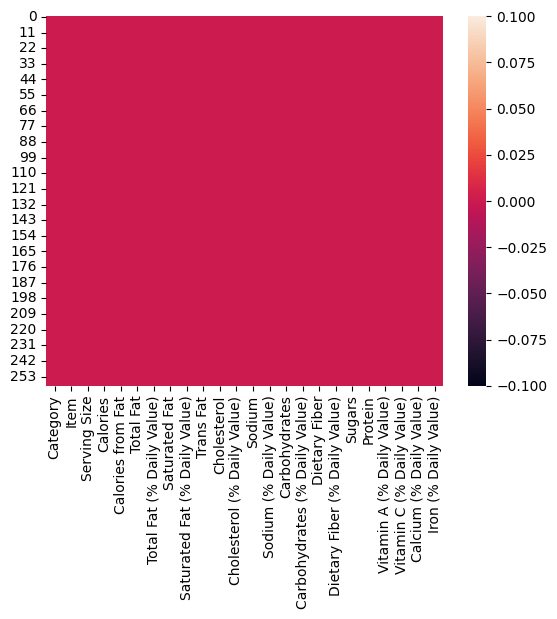

In [9]:
sns.heatmap(df.isnull())

In [10]:
df.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,...,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


In [11]:
df.shape

(260, 24)

# Visualisasi Data

<ipython-input-12-ee535b2cc5be>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

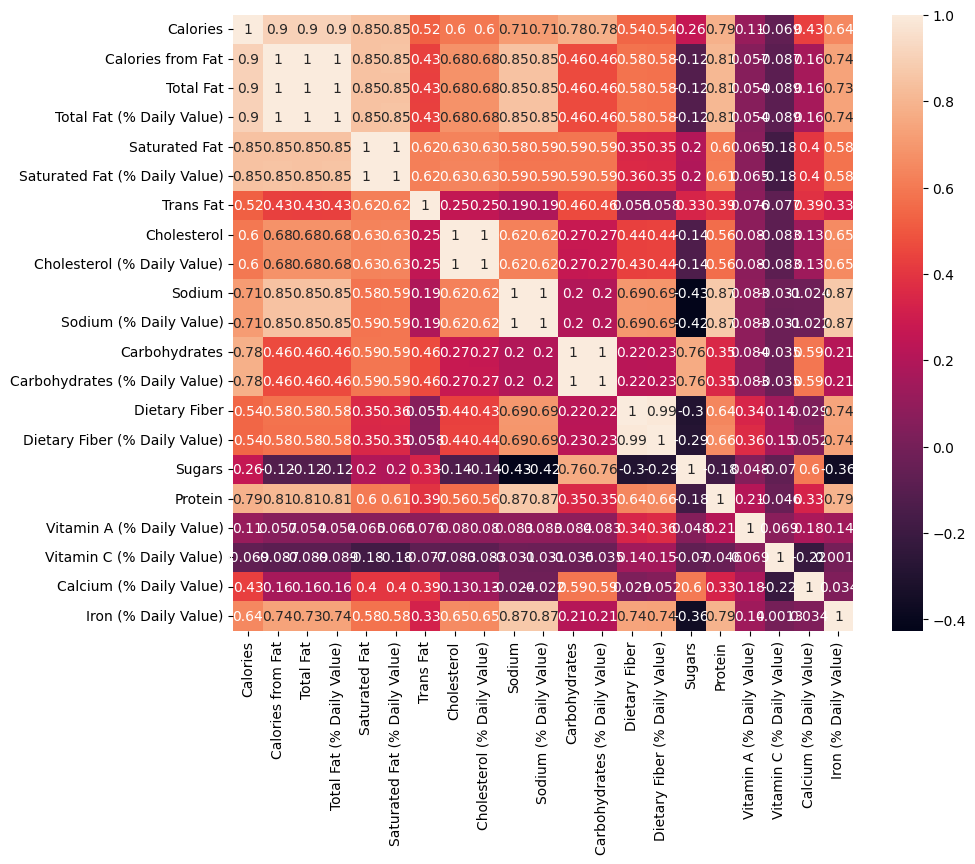

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

# Jumlah makanan berdasarkan item

In [13]:
Item = df.groupby('Item').count()[['Saturated Fat']].sort_values(by='Saturated Fat', ascending=True).reset_index()
Item = Item.rename(columns={'Saturated Fat':'numberOfCalories'})

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

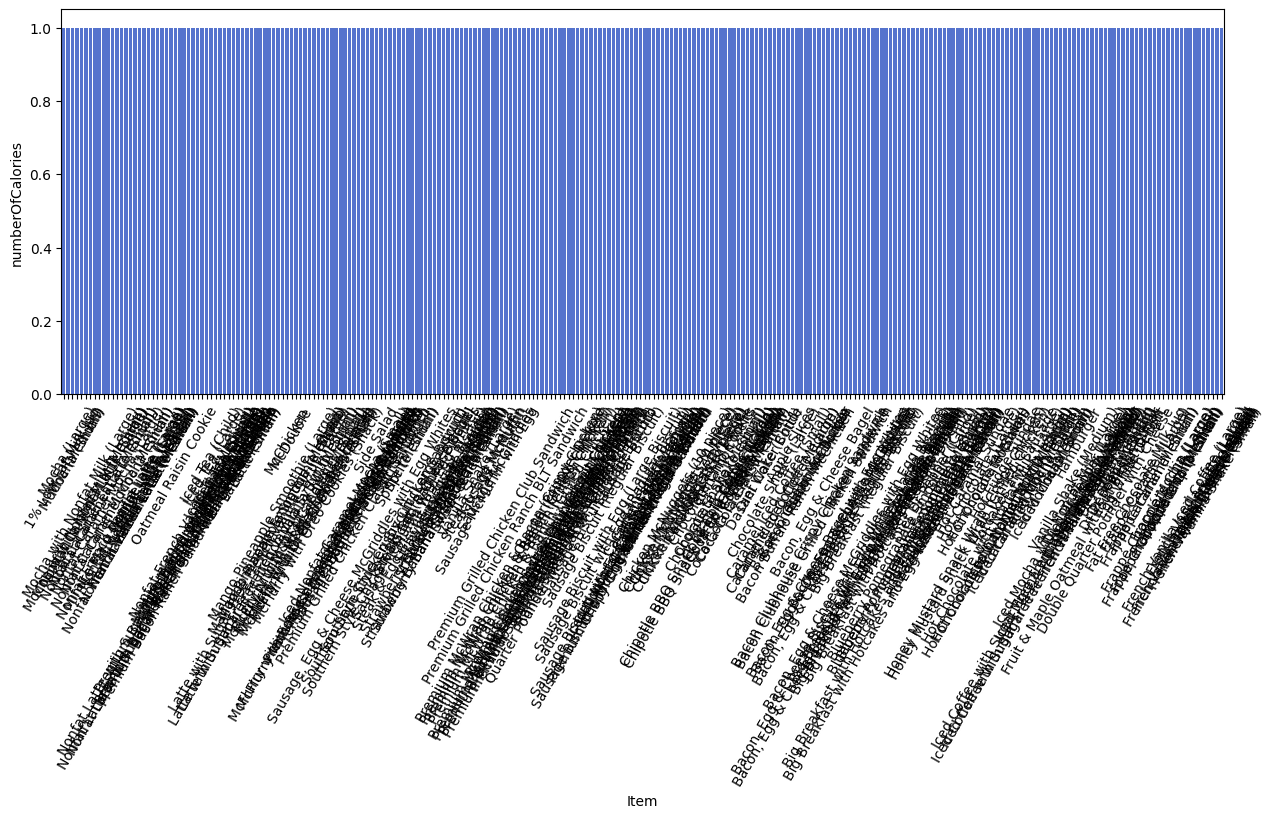

In [14]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=Item['Item'], y=Item['numberOfCalories'], color='royalblue')
plt.xticks(rotation=60)

# Jumlah gula

In [15]:
Sugars = df.groupby('Sugars').count()[['Saturated Fat']].sort_values(by='Saturated Fat').reset_index()
Sugars = Sugars.rename(columns={'Saturated Fat':'count'})

<Axes: xlabel='Sugars', ylabel='count'>

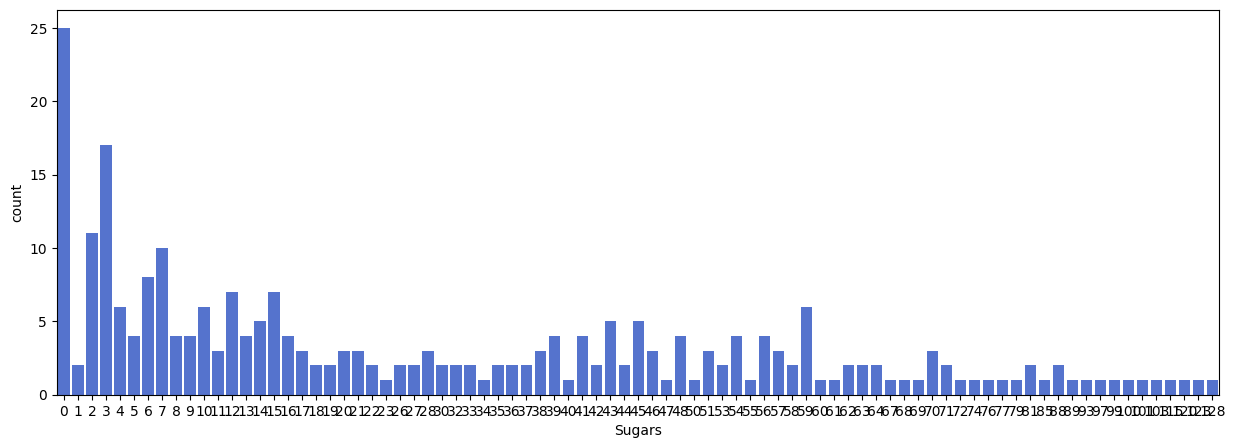

In [16]:
plt.figure(figsize=(15,5))
sns.barplot(x=Sugars['Sugars'], y=Sugars['count'], color='royalblue')

# Distribusi jumlah karbohidrat

<ipython-input-17-a3493a11aeef>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Carbohydrates'])


<Axes: xlabel='Carbohydrates', ylabel='Density'>

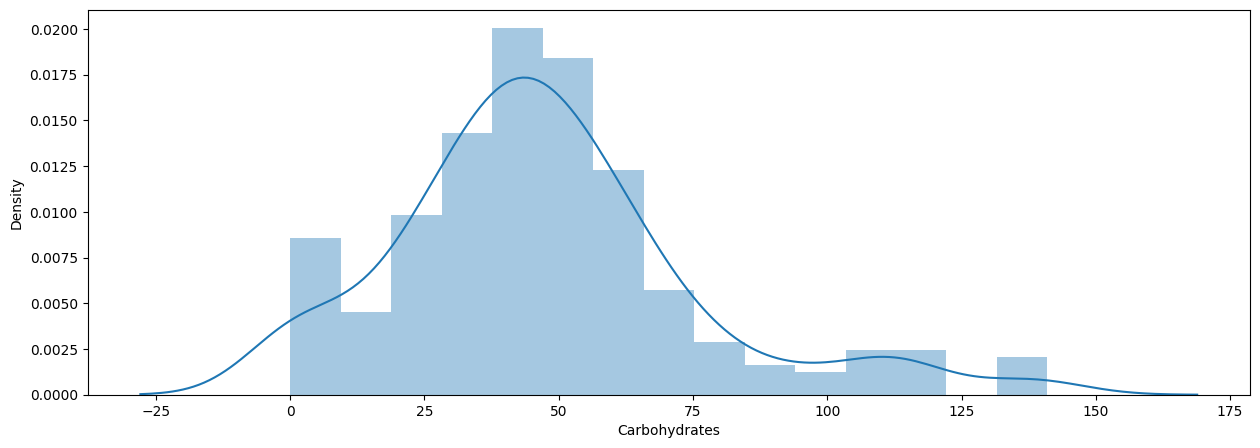

In [17]:
plt.figure(figsize=(15,5))
sns.distplot(df['Carbohydrates'])

# Distribusi protein

<ipython-input-18-ed38bcdd443d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Protein'])


<Axes: xlabel='Protein', ylabel='Density'>

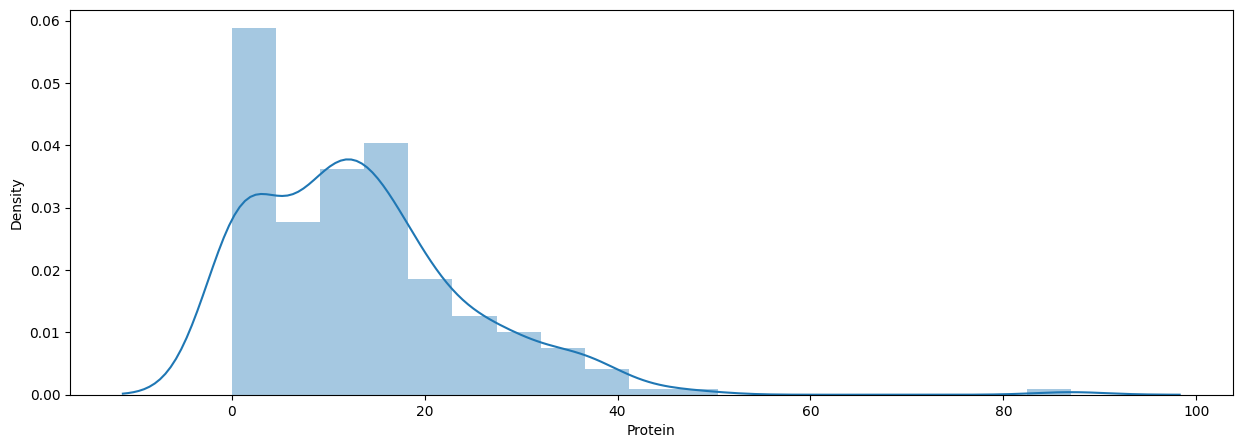

In [18]:
plt.figure(figsize=(15,5))
sns.distplot(df['Protein'])

# Seleksi fitur

In [19]:
features = ['Total Fat', 'Saturated Fat', 'Sugars', 'Cholesterol', 'Sodium', 'Calories', 'Carbohydrates']
x = df[features]
y = df['Protein']
x.shape, y.shape

((260, 7), (260,))

# Split data training dan data testing

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=70)
y_test.shape

(65,)

# Membuat model regresi linear

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

In [23]:
score = lr.score(x_test, y_test)
print('akurasi model regresi linier =', score)

akurasi model regresi linier = 0.9897485225648139


# Membuat inputan model regresi linear

In [26]:
#Total Fat=8, Saturated Fat=3, Sugars=3, Cholesterol=25, Sodium=770, Calories=250, Carbohdyrates=30
input_data = np.array([[8, 3, 3, 25, 770, 250, 30]])

prediction = lr.predict(input_data)
print('Estimasi kalori dalam Menu McDonalds :', prediction)

Estimasi kalori dalam Menu McDonalds : [14.56961434]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Evaluasi (R2 Score)

In [27]:
from sklearn.metrics import r2_score
r2_DT = r2_score(y_test, pred)
r2_DT

print(f"Precision = {r2_DT}")

Precision = 0.9897485225648139


# Save model

In [28]:
import pickle

filename = 'estimasi_protein.sav'
pickle.dump(lr, open(filename, 'wb'))